In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import datetime

df=pd.read_csv('Students Social Media Addiction (1).csv')
###loading the data

In [26]:
df.isnull().sum() ###No missing values found in the dataset so no removal or manipulation is needed

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [27]:
df


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [28]:
# Step 1: Creating separate columns for analysis and display
df['Gender_Num'] = df['Gender'].map({'Male': 1, 'Female': 0})  # for math or heatmap
df['Affects_Academic_Num'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})  # for math and for mean calculation etc later operations
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Num,Affects_Academic_Num
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,0,1
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,1,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,0,1
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,1,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,0,0
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,1,1
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,0,1
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,1,0


In [29]:
average_use_comparison_by_gender=df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().reset_index()
average_use_comparison_by_gender

,Gender,Avg_Daily_Usage_Hours
0,Female,5.011048
1,Male,4.826136


In [30]:
fig1=px.bar(average_use_comparison_by_gender,x="Gender",y="Avg_Daily_Usage_Hours",title="average usage by gender",text="Avg_Daily_Usage_Hours")
fig1.show()

In [31]:
###"On average females spend 1 hour more on social media daily compared to males"

In [32]:
conflict_trend = df.groupby('Avg_Daily_Usage_Hours')['Conflicts_Over_Social_Media'].mean().reset_index()
fig2 = px.line(conflict_trend,
              x='Avg_Daily_Usage_Hours',
              y='Conflicts_Over_Social_Media',
              title='Relation between social media time spending and conflicts')
fig2.update_layout(xaxis_title='Avg Daily Usage (Hours)',
                  yaxis_title='Average Number of Conflicts')
fig2.show()


In [33]:
####"Social media use of up to 2 hours a day seems harmless but usage beyond that is linked to more conflicts"

In [34]:
academic_level=df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean().reset_index()
academic_level
fig3=px.pie(academic_level,names='Academic_Level',values='Avg_Daily_Usage_Hours',title="average usage by academic level")
fig3.show()

In [35]:
###Individuals with only a high school education use social media more than those with undergraduate or graduate degrees

In [36]:
country_wise_usage = df.groupby('Country')['Avg_Daily_Usage_Hours'].mean().reset_index()
country_wise_usage = country_wise_usage.sort_values(by='Avg_Daily_Usage_Hours', ascending=False)
px.bar(country_wise_usage,x='Country',y='Avg_Daily_Usage_Hours',title="average usage by country")


In [37]:
###The chart shows that the USA has the highest average daily social media usage among all countries.

In [38]:
addiction_scorevsacademic_performance=df.groupby('Addicted_Score')['Affects_Academic_Num'].value_counts().reset_index(name='count')
filtered_df = addiction_scorevsacademic_performance[addiction_scorevsacademic_performance['Affects_Academic_Num'] == 1].reset_index(drop=True)
filtered_df
px.bar(filtered_df,x='Addicted_Score',y='count',title="addiction score vs academic performance")

In [39]:
#######It is evident that individuals with an addiction score above 5 tend to experience a negative impact on their academic performance.

In [40]:
def risklevel(hours):
    if hours <= 2:
        return 'Low'
    elif hours <= 5:
        return 'Medium'
    else:
        return 'High'
df['risklevels']=df['Avg_Daily_Usage_Hours'].apply(risklevel)
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Num,Affects_Academic_Num,risklevels
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,0,1,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,1,0,Medium
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,0,1,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,1,0,Medium
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,0,0,Medium
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,1,1,High
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,0,1,High
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,1,0,Medium


In [41]:
def detox_strategy(risk):                    ###detox strategy function
    if risk == 'Low':
        return 'Maintain healthy habits and take occasional breaks.'
    elif risk == 'Medium':
        return 'Limit screen time, turn off notifications, try digital-free mornings.'
    else:
        return 'Consider app blockers, daily detox time, and guided offline activities.'

df['detox_strategy'] = df['risklevels'].apply(detox_strategy)
riskfig=df.groupby('risklevels')['detox_strategy'].value_counts().reset_index(name='Count')
px.bar(riskfig,x='risklevels',y='Count',color='detox_strategy',title="detox strategy")


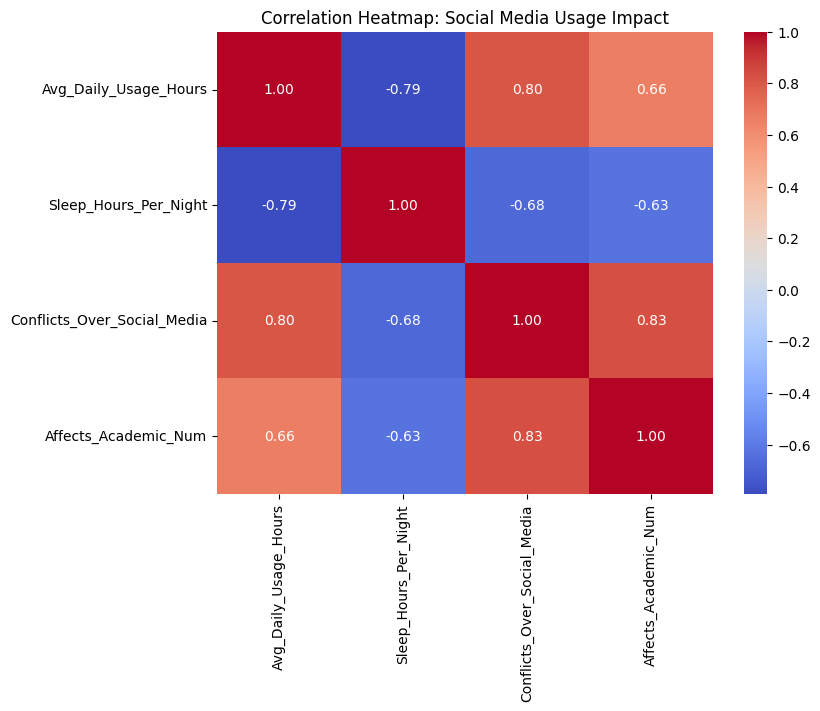

In [42]:
# Select only numeric columns for correlation
heatmap_data = df[['Avg_Daily_Usage_Hours',
                   'Sleep_Hours_Per_Night',
                   'Conflicts_Over_Social_Media',
                   'Affects_Academic_Num']]

# Compute correlation matrix
corr = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Social Media Usage Impact')
plt.show()


In [43]:
###The heatmap reveals a strong positive correlation between daily usage hoursand conflicts over social media, and a negative correlation with sleep hours, indicating that higher screen time may lead to both increased conflicts and reduced sleep

In [44]:
conflicts_by_gender = df.groupby('Gender')['Conflicts_Over_Social_Media'].mean().reset_index()
px.bar(conflicts_by_gender,x='Gender',y='Conflicts_Over_Social_Media',title="conflicts by gender")


In [45]:
###females have slightly more conflicts on social media than males

In [46]:
### Story Summary — Combating Social Media Addiction
###Story Summary — Insights on Social Media Addiction

"""On average, female students spend 1 hour more on social media daily compared to male students

Usage of up to 2 hours per day appears relatively harmless, but going beyond that correlates with a sharp rise in online conflicts

Individuals with only a high school education reported the highest daily usage in compare those with undergraduate or graduate degrees

Among all countries in the dataset the USA recorded the highest average daily social media usage

Students with an addiction score above 5 showed higher likelihood of reporting negative impacts on academic performance

Sleep duration generally decreased as daily usage hours increased hinting at a negative impact on rest

Female students also reported slightly more conflicts over social media than male students

Medium- and high-risk users consistently displayed more academic disruption compared to low-risk users

The data suggests that targeted digital detox strategies could help reduce conflicts and improve academic outcomes

Overall the findings highlights the urgent need for awareness programs to promote balanced social media habits"""


'On average, female students spend 1 hour more on social media daily compared to male students\n\nUsage of up to 2 hours per day appears relatively harmless, but going beyond that correlates with a sharp rise in online conflicts\n\nIndividuals with only a high school education reported the highest daily usage in compare those with undergraduate or graduate degrees\n\nAmong all countries in the dataset the USA recorded the highest average daily social media usage\n\nStudents with an addiction score above 5 showed higher likelihood of reporting negative impacts on academic performance\n\nSleep duration generally decreased as daily usage hours increased hinting at a negative impact on rest\n\nFemale students also reported slightly more conflicts over social media than male students\n\nMedium- and high-risk users consistently displayed more academic disruption compared to low-risk users\n\nThe data suggests that targeted digital detox strategies could help reduce conflicts and improve acad